In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
import emcee
from pprint import pprint

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(A,f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata00 = pd.read_csv("perlist00.csv")
    f = perdata00['f']
    per = perdata00['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata00)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
m=Minuit(twi_minus_loglikelihood,A=0.005,f_b=1.7E-4,alpha_H=3.8,poisson=0.8,
         error_A=0.0001,error_f_b=1.0E-5,error_alpha_H=0.01,error_poisson=0.01,
         limit_A=(0.001,0.01), limit_f_b=(1.0E-4,1.0E-3),limit_alpha_H=(2.0,5.0),limit_poisson=(0,1),
         errordef=1)

In [4]:
m.migrad()

326.25985765080605
326.25696216125806
326.26275464750574
326.2309704812444
326.2888955356907
326.238286435313
326.28146204725385
326.2131195892432
326.3067517618009
326.2609006688678
326.2588147016205
326.27029092772545
326.24943126153454
326.2917124243864
326.22799805916424
326.44108150244955
326.07847774976824
326.07847774976824
325.3514131255773
323.5232116486788
317.9555109343111
300.7263168898887
253.79464117376818
751.095161926842
277.0340613945565
247.72698665139416
245.7874266494233
245.50019523996477
245.4498046393886
245.55077347742431
245.41930370624232
245.58128110640308
245.5989888345741
245.4015114139126
245.48318621340297
245.518366521132
245.49466041266905
245.50584760750957
249.69331675391456
241.37763133717965
233.9799399166395
226.9852859623153
226.98474706986406
226.98588421868226
226.98413677165286
226.986485431202
226.98361352314745
226.98706711330286
226.98805253564376
226.98292544823917
226.98666683067827
226.98401380593293
226.9985711625779
226.9720893773363
22

FCN = 225.81874023099374 
 TOTAL NCALL = 150 
 NCALLS = 150 
 
 
 EDM = 5.131682437190387e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.00593157,0.00676127,,,0.001,0.01,No
1,f_b,0.00016548,0.000183371,,,0.0001,0.001,No
2,alpha_H,2.58801,0.750826,,,2,5,No
3,poisson,0.408119,0.0296436,,,0,1,No


({'fval': 225.81874023099374,
  'edm': 5.131682437190387e-06,
  'nfcn': 150,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 0.005931568242742783,
   'error': 0.006761267001087538,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.001,
   'upper_limit': 0.01},
  {'number': 1,
   'name': 'f_b',
   'value': 0.0001654802221753269,
   'error': 0.0001833711986565022,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.0001,
   'upper_limit': 0.001},
  {'number': 2,
   'name': 'alpha_H',
   'value': 2.5880147768245507,
   'error': 0.75082619818093

In [5]:
pprint(m.fval)
m.print_param()

225.81874023099374


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.00593157,0.00676127,,,0.001,0.01,No
1,f_b,0.00016548,0.000183371,,,0.0001,0.001,No
2,alpha_H,2.58801,0.750826,,,2,5,No
3,poisson,0.408119,0.0296436,,,0,1,No


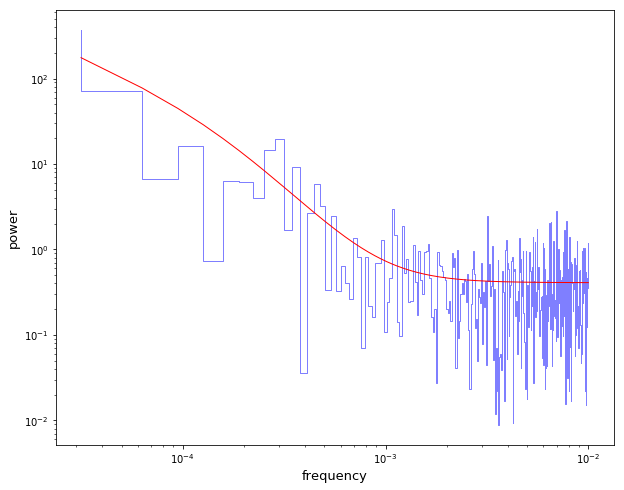

In [6]:
perdata00 = pd.read_csv("perlist00.csv")
f = perdata00['f']
per = perdata00['per']

alpha_L = 1.0
A,f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()